*First compiled: November 11, 2017 by T. Callies.*

# Exporting to SPRING

<table style="width:100%">
  <tr>
    <th>Gene_Exploration</th>
    <th>Cluster_Visualization</th> 
    <th>Pseudotime</th>
  </tr>
  <tr>
    <td><img src="figures/Krumsiek_Gene.png", height="420" width="680"> </td>
    <td><img src="figures/Krumiek_Clusters.png" , height="420" width="680"> </td>
    <td><img src="figures/Krumsiek_Pseudotime.png", height="420" width="680" > </td>
  </tr>
</table>



In contrast to Scanpy's builtin visualization tools, the graph drawing tool SPRING of 
[Weinreb *et al.* (2017)](https://doi.org/10.1101/090332) allows an *interactive* exploration of data.

Scanpy allows exporting SPRING projects via [*sc.export_to.spring_dir*](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.export_to.spring_project.html).

To start, clone (or download) https://github.com/AllonKleinLab/SPRING to your preferred destination directory, in the following referred to as SPRING_INSTALLATION. Here, we use the current working directory of this notebook.
```
git clone https://github.com/AllonKleinLab/SPRING.git
```

After exporting an `AnnData` object `adata`
```
sc.export_to.spring_project(adata)
```
in the terminal, type
```    
python -m http.server 8000 &
```
or `python3` if `python` defaults to a Python 2 installation.

Now, in a browser, open 
```
http://localhost:8000/<SPRING_INSTALLATION>/springViewer.html?<Relative_Path_To_SPRING_PROJECT>
```

## Example 1: simulated myeloid progenitors


In [1]:
import scanpy.api as sc
import numpy as np
sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)    # dots (pixels) per inch determine size of inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()

Running Scanpy 0.3.2+2.g8224a7f on 2017-12-01 12:32.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


For background information, see [here](https://github.com/theislab/scanpy_usage/tree/master/170430_krumsiek11).

In [2]:
adata_krumsiek11 = sc.datasets.krumsiek11()

--> you can reproduce the data file /Users/alexwolf/hholtz/01_projects/1512_scanpy/scanpy/scanpy/datasets/krumsiek11.txt by running `sc.tl.sim("krumsiek11")`
reading cache ./write/data/Users/alexwolf/hholtz/01_projects/1512_scanpy/scanpy/scanpy/datasets/krumsiek11.h5


Let us add some computational analysis results.

In [3]:
sc.tl.louvain(adata_krumsiek11)
sc.tl.dpt(adata_krumsiek11, n_branchings=1)

running Louvain clustering
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9984187484  0.9969584346  0.9920812845  0.9909051061
      0.982462585   0.9651808739  0.9614251256  0.9520589113  0.9385533333
      0.9172905087  0.9089729786  0.8958995342  0.8761984706  0.8536655903]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.570): found 9 clusters and added
    'louvain_groups', the cluster labels (adata.smp, dtype=category)
perform Diffusion Pseudotime analysis
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            0.9984187484  0.9969584346  0.9920812845  0.9909051061
      0.982462585   0.9651808739  0.9614251256  0.9520589113  0.9385533333]
    detect 1 branching
    do not consider group

The `sc.tl.draw_graph` function provides various graph drawing layouts, but not in an interactive way.

In [4]:
sc.tl.draw_graph(adata_krumsiek11)

drawing single-cell graph using layout "fr"
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            0.9984187484  0.9969584346  0.9920812845  0.9909051061
      0.982462585   0.9651808739  0.9614251256  0.9520589113  0.9385533333]
    finished (0:00:03.809) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.smp)
    'draw_graph_params', the parameters (adata.uns)


Let's plot this.

... storing cell_type as categorical type
--> access categories as adata.smp['cell_type'].cat.categories


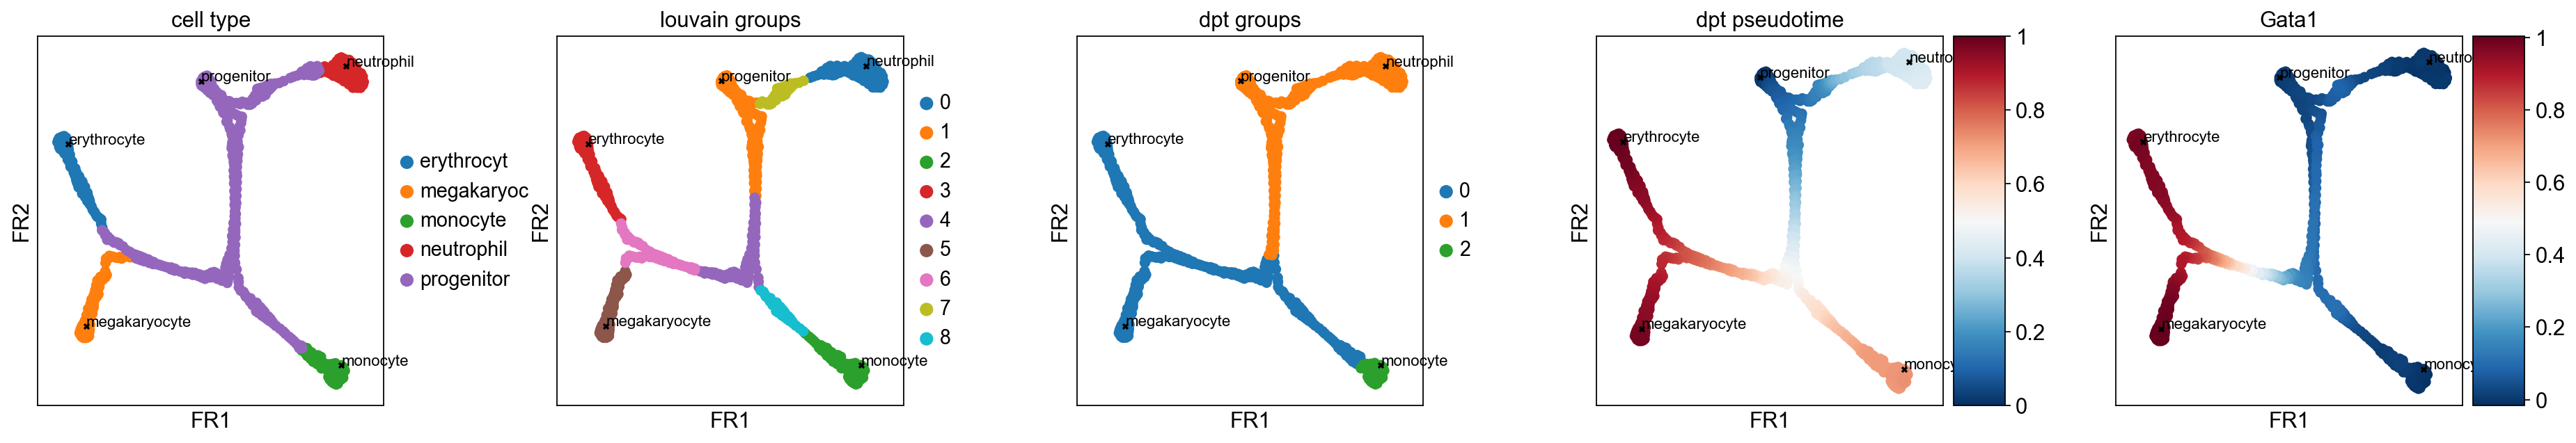

In [5]:
ax = sc.pl.draw_graph(adata_krumsiek11, color=['cell_type', 'louvain_groups', 'dpt_groups', 'dpt_pseudotime', 'Gata1'])

In [6]:
sc.write('./write/krumsiek11.h5', adata_krumsiek11, compression='gzip')

Exporting the results to a SPRING project directory.

In [7]:
adata_krumsiek11 = sc.read('./write/krumsiek11.h5')

In [8]:
sc.export_to.spring_project(adata_krumsiek11, './spring_krumsiek11')

Now, after starting a server, open
```
http://localhost:8000/SPRING/springViewer.html?../spring_kurmsiek11
```
You might need to click 'center view' and 'deselect all' to see the data.

## Example 2: 3k PBMCs data 

This starts from the standard clustering tutorial: https://github.com/theislab/scanpy_usage/tree/master/170505_seurat.

**Selecting genes**: It is recommended that - especially for large datasets - only a preselected number of genes of interest is used for SPRING, so that these genes can be found more easily (in the dataset below, searching for a certain gene in a dropdown list of ca. 13000 entries can be hard ). 

In [9]:
adata_normalized = sc.read('../170505_seurat/write/pbmc3k_corrected.h5')
adata_raw = sc.read('../170505_seurat/write/pbmc3k_filtered_raw.h5')

In [10]:
sc.tl.draw_graph(adata_normalized)

drawing single-cell graph using layout "fr"
    using 'X_pca' with n_pcs = 50 for building graph
    using stored data graph with n_neighbors = 10 and spectrum
    [ 1.            0.9938759804  0.9874853492  0.9716261625  0.9538829923
      0.9355867505  0.9228008389  0.8264053464  0.8115137219  0.7480960488
      0.7456020117  0.7311634421  0.7090933919  0.7047501802  0.6949557662]
    finished (0:00:46.894) --> added
    'X_draw_graph_fr', graph_drawing coordinates (adata.smp)
    'draw_graph_params', the parameters (adata.uns)


Plot the groups.

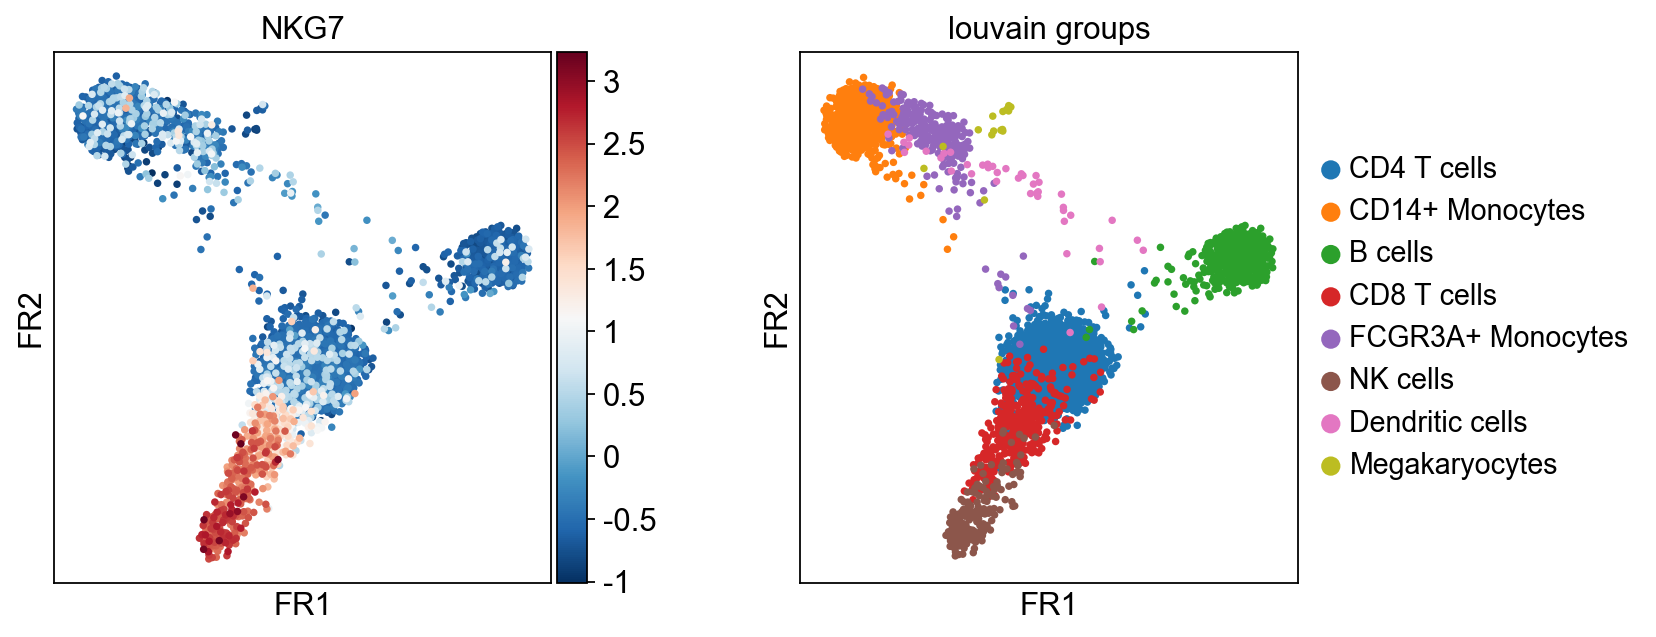

In [11]:
ax = sc.pl.draw_graph(adata_normalized, color=['NKG7', 'louvain_groups'])

In [12]:
adata_raw.smp['louvain_groups'] = adata_normalized.smp['louvain_groups']

rank differentially expressed genes
    consider 'louvain_groups': ['CD4 T cells' 'CD14+ Monocytes' 'B cells' 'CD8 T cells'
 'FCGR3A+ Monocytes' 'NK cells' 'Dendritic cells' 'Megakaryocytes'] with sample numbers [1110  417  340  328  219  166   42   16]
    finished (0:00:00.982) --> added
    'rank_genes_groups_gene_names', np.recarray to be indexed by group ids (adata.uns)
    'rank_genes_groups_gene_scores', np.recarray to be indexed by group ids (adata.uns)


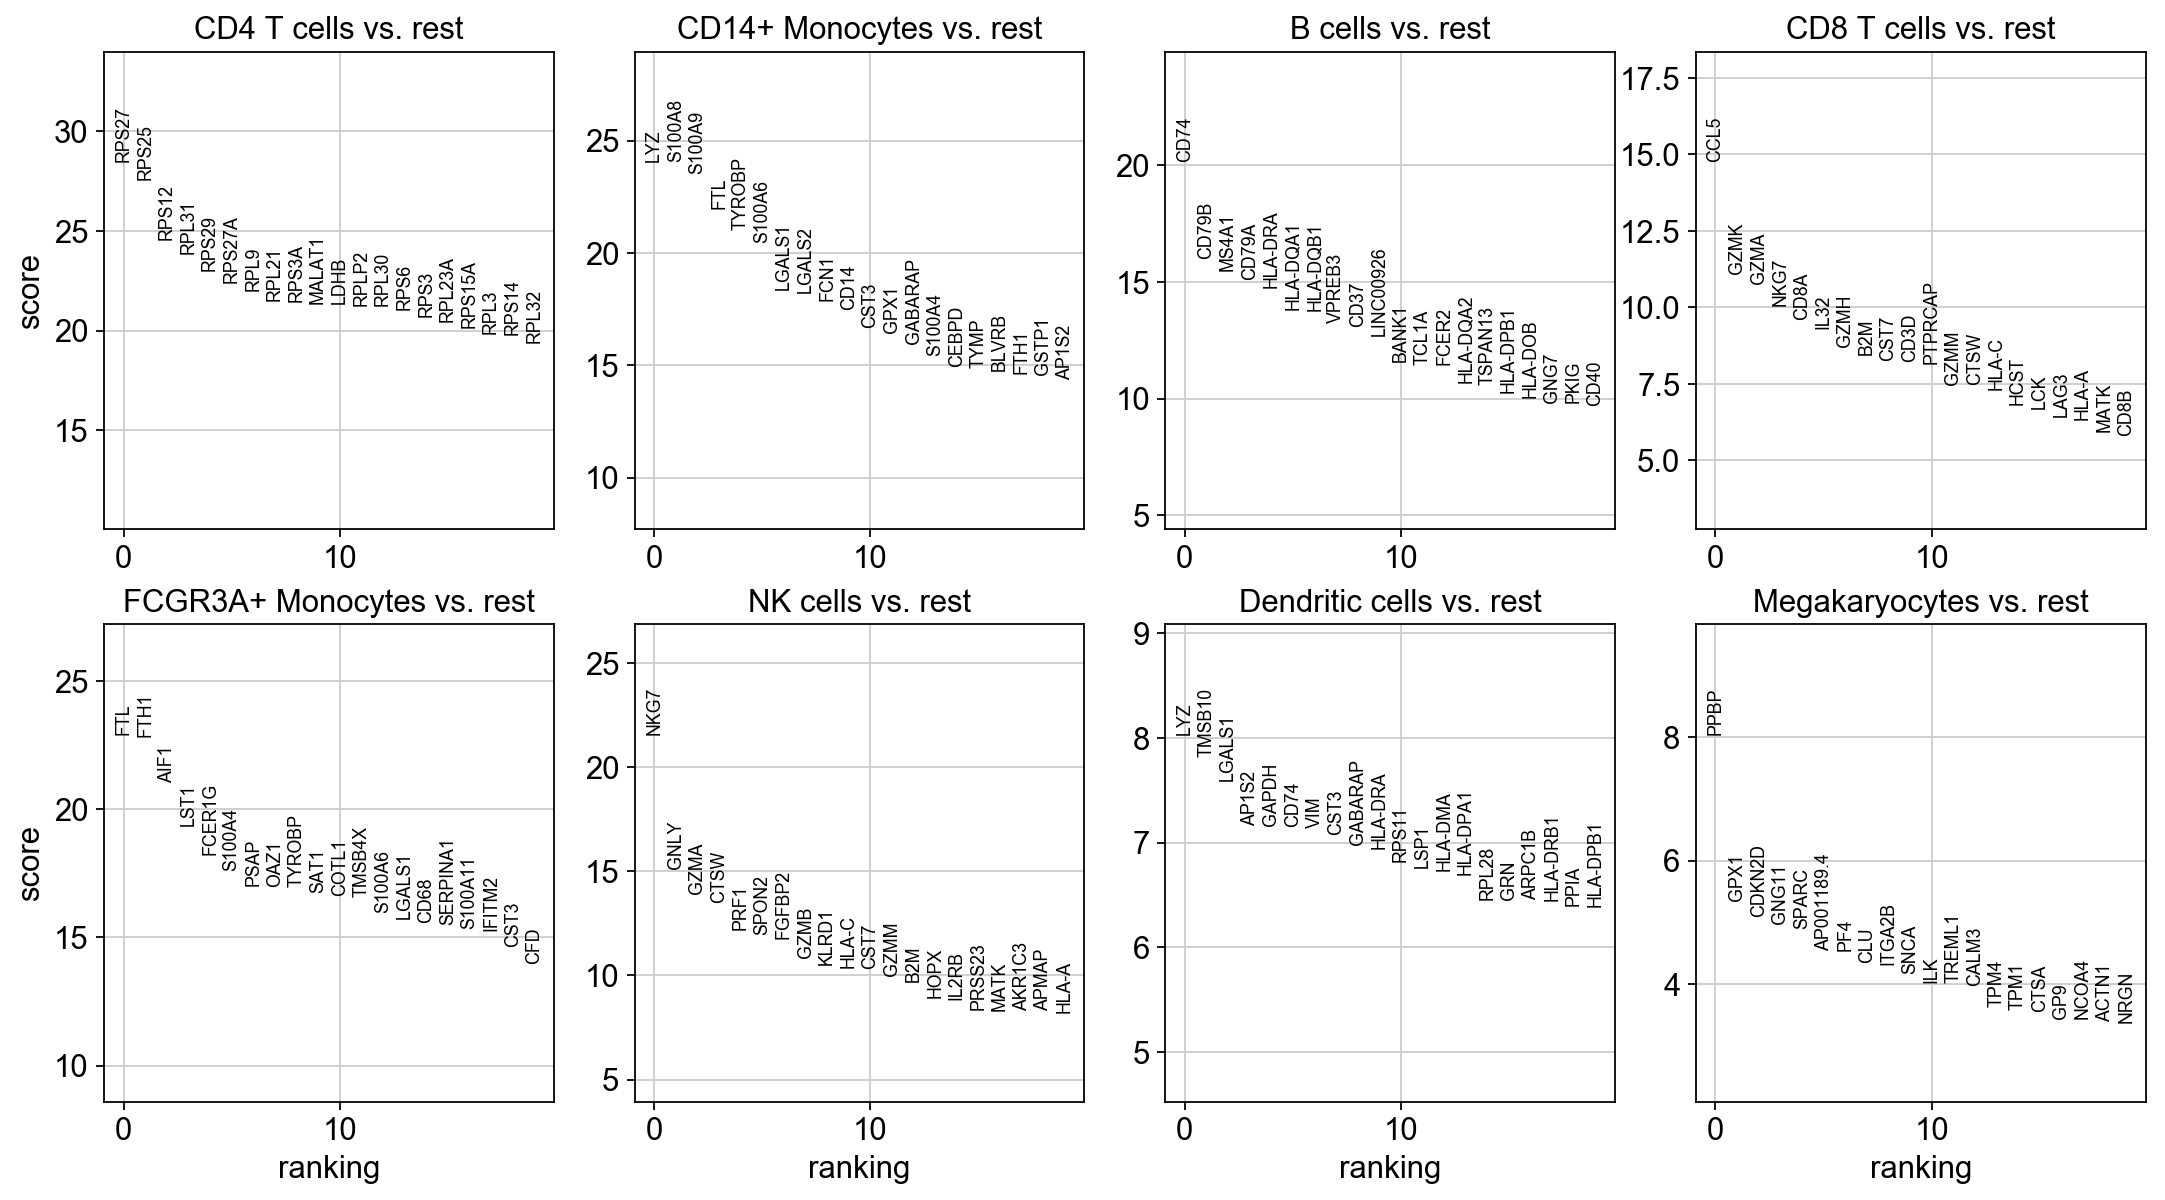

In [13]:
# Rank genes in order to include only significant ones. 
# Note that the ranking function by default ranks 100, not 20 as displayed below. 
sc.tl.rank_genes_groups(adata_raw, 'louvain_groups')
sc.pl.rank_genes_groups(adata_raw, n_genes=20)

Use the stored graph in `adata_normalized`.

In [14]:
adata_raw.uns['data_graph_distance_local'] = adata_normalized.uns['data_graph_distance_local']

In [15]:
# export some known marker genes
known_marker_genes = ['IL7R','CD14','LYZ', 'MS4A1', 'CD8A', 'FCGR3A', 'MS4A7',
                      'GNLY', 'NKG7', 'FCER1A', 'CST3', 'PPBP']
sc.export_to.spring_project(
    adata_raw, './spring_pbmc3k_known_markers', 
    use_genes=known_marker_genes)

In [16]:
# export the ranked genes
sc.export_to.spring_project(
    adata_raw, './spring_pbmc3k_ranked_genes', 
    use_genes='rank_genes_groups_gene_names')